# **Analysis for one trial**

## This analysis script is for a single trial.

load modules

In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

set session name

In [2]:
## extract HD cells, for decoding
# name="pk3864-07022022-0109"
# name="pk3864-09022022-0109"
name = "pk3864-10022022-0101"
name = "pk3864-23022022-0101"

## first trials, for screening
# name="pk3855-21022022-0101"
# name="pk3855-22022022-0101"
# name="pk3855-23022022-0101"
# name="pk3855-24022022-0101"
# name="pk3855-25022022-0101"
# name="pk3856-08032022-0101"

# name="pk3864-14032022-0101"
# name="pk3856-14032022-0101"
# name="bt64245-14032022-0101"
# name="bt64245-15032022-0101"
# name="pk3864-21032022-0101" # check
# name="pk3864-22032022-0101"
# name="pk3864-23032022-0101"
# name="pk3864-24032022-0101"
# name="pk3864-28032022-0101"

# name="pk3921-31032022-0101"
# name="pk3921-01042022-0101"
# name="pk3921-04042022-0101"
# name="pk3921-05042022-0101"
# name="pk3921-06042022-0101"
# name="pk3921-07042022-0101"
# name="pk3921-08042022-0101"
# name="pk3924-11042022-0101"
# name="pk3924-12042022-0101"
# name="pk3924-13042022-0101"

name="pk3190-03052022-0101"

name="pk3190-04052022-0101_A"
name="pk3192-04052022-0101_A"
name="pk3190-04052022-0101_B"
name="pk3192-04052022-0101_B"

name="pk3190-05052022-0101_A"
#name="pk3192-05052022-0101_A"
#name="pk3192-05052022-0101_B"
name="pk3190-05052022-0101_B"


name="pk3190-09052022-0101"
name="pk3192-09052022-0101"

name="pk3190-10052022-0101"

name="pk3192-13052022-0101"
name="pk3190-13052022-0101"

name="pk3190-16052022-0101_A"
name="pk3190-16052022-0101_B"

name="pk3190-17052022-0101"
name="pk3192-17052022-0101"

name="pk3192-18052022-0101"

name="pk3192-19052022-0101"
name="pk3190-19052022-0101"

name="pk3190-24052022-0101"
name="pk3192-24052022-0101"

# name="pk3190-24052022-0103" # HD decode trial 1,2,3

# more screening for grid / HD cells in pk3190 and HD cells in pk3192

name="pk3190-30052022-0101_A"
name="pk3190-30052022-0101_B"

name="pk3192-30052022-0101_A"
name="pk3192-30052022-0101_B"
name="pk3192-31052022-0101_A"
name="pk3192-31052022-0101_B"

name="pk3190-01062022-0101"

name="pk3192-01062022-0101_A"
name="pk3192-01062022-0101_B"

name="pk3190-02062022-0101"
#name="pk3192-02062022-0101"


name="pk3190-04062022-0101"
#name="pk3190-05062022-0101"

name="pk3190-08062022-0101_A"
name="pk3190-08062022-0101_B"

name="tyy8977-23062022-0101_A"
name="tyy8977-23062022-0101_B"
name="tyy8977-24062022-0101"


name="pk6267-28062022-0101_A"
name="pk6267-28062022-0101_B"

name="pk6267-29062022-0101_A"
name="pk6267-29062022-0101_B"
name="pk6267-29062022-0101_C"

name="pk6266-30062022-0101"

name="pk6267-30062022-0101_A"
name="pk6267-30062022-0101_B"

name="pk6267-04072022-0101"

name="pk6267-05072022-0101_A"
name="pk6267-05072022-0101_B"
name="pk6267-05072022-0101_C"
name="pk6267-05072022-0101_D"

name="pk6267-06072022-0101"

##

name="pk6273-20072022-0101"
name="pk6266-09072022-0105"

name="bt1009-24102021-0105"

##

name="pk6276-11082022-0101_A"
name="pk6276-11082022-0101_B"
name="pk6276-12082022-0101_A"
name="pk6276-12082022-0101_B"

#
name="pk10486-16082022-0101_A"
name="pk10486-16082022-0101_B"

name="pk10486-17082022-0101_A"
name="pk10486-17082022-0101_B"

Check the path

In [3]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk10486/pk10486-17082022-0101_B/
Mouse: pk10486
Session: 17082022-0101_B
Name: pk10486-17082022-0101_B , pk10486-17082022-0101

Path: OK


## Get a Session object

Check the files

In [4]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files(ignore_params=True)  # ignore_params if kilosort has not been executed so far
print(ses)

self.px_per_cm <class 'float'> 9.0
<class 'spikeA.Session.Kilosort_session'>
name = pk10486-17082022-0101
path = /adata/electro/pk10486/pk10486-17082022-0101_B
subject = pk10486
session_dat_time = 2022-08-17 01:01:00
fileBase = /adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101
file_names = {'par': '/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.par', 'desen': '/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.desen', 'desel': '/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.desel', 'sampling_rate': '/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.sampling_rate_dat', 'stimulation': '/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.stimulation', 'px_per_cm': '/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.px_per_cm', 'setup': '/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.setup', 'environmentFamiliarity': '/adata/electro/pk

## Load spikes

In [5]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)#, only_good=False)
print("stl.clu_ids",len(stl.clu_ids), stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids 38 [ 0  1  2  3  4  5  8  9 11 12 14 18 23 24 25 26 27 30 31 32 33 34 35 36
 45 47 50 51 55 56 57 60 91 94 95 96 98 99]


## Load the waveforms

Set the waveform and channel information from the session template file.

In [6]:
cg.set_info_from_session(ses, maxchannels=5)

Templates: 103 , timepoints: 82 , Channels: 64
Loaded templates-clusters-map, spikes: 312145 , clusters: 101
Init shanks: 8


For each cluster, print the active channels where the spikes were detected, and the corresponding brain area.

In [7]:
unique, counts = np.unique([ '/'.join(n.brain_area) for n in cg.neuron_list ] , return_counts=True )

for u,c in zip(unique, counts):
    print(u,":",c)

mec/pos : 2
pos : 36


## Create a pose file 

In [8]:
ap = Animal_pose(ses)
posefilename = ses.fileBase + ap.pose_file_extension
print("look for", posefilename)
if not os.path.exists(posefilename):
    print("load from positrack")
    extension = ap.positrack_type()
    print("use extension:",extension)
    ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension=extension)
    ap.save_pose_to_file() # save the file for next time
else:
    print("load from saved pose file")
    ap.load_pose_from_file()

look for /adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022-0101.pose.npy
load from positrack
use extension: positrack
Interpolation step: 400.0 samples
/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022_01.dat
/adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022_01.positrack
Number of ttl pulses detected: 58021
Number of lines in positrack file: 58417
alignment problem
396 more video frames than ttl pulses
first ttl sample: 40581
last ttl sample: 23772495
samples in dat file: 23772600
last ttl to end of dat file duration: 0.0053 sec
positrack process did not stop before the end of .dat file
Number of lines in adjusted positrack file: 58021
Alignment problem solved by deleting superfluent ttl pulses in positrack
Saving /adata/electro/pk10486/pk10486-17082022-0101_B/pk10486-17082022_01.ttl_up.npy
hdRange: 359.99
degree to radian transformation
Invalid values: 565
Valid values: 289540
Percentage of invalid values: 0.195%

shape of position data for al

In [9]:
ap.invalid_ratio()

0.004189662134876834

In [10]:
ses.trial_intervals.inter

array([[   0.     , 1188.62995]])

In [11]:
ses.trial_intervals.inter[0]

array([   0.     , 1188.62995])

In [12]:
#~ ap.pose[:,[1,2]]=xypos

In [13]:
arena, diameter, *_ = ses.session_trials()[0][3]
print("arena:", arena)
print("diameter:", diameter)

# diameter=70.
# arena="square"

arena: square
diameter: 70.0


In [14]:
# find good shape automagically & crop

xy_range=ap.find_xy_range(diameter=diameter)
xyrange_min,xyrange_max=xy_range
xmean,ymean = ap.meanloc
center = np.mean(xy_range, axis=0)
print("xmean,ymean",xmean,ymean)
print("xyrange_min,xyrange_max",xyrange_min,xyrange_max)
print("center", center)

xmean,ymean 44.28237675897757 62.31101468151083
xyrange_min,xyrange_max [11. 23.] [81. 93.]
center [46. 58.]


Plot the path of the animal to see if it was loaded correctly.

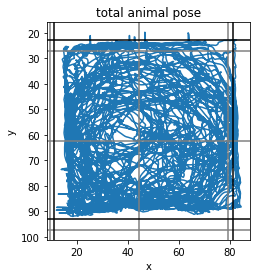

In [15]:
plt.plot(ap.pose[:,1],ap.pose[:,2])
plt.xlabel("x")
plt.ylabel("y")
#plt.scatter([xmean],[ymean], color="black", s=20)
plt.axvline(x=xmean, color="gray")
plt.axhline(y=ymean, color="gray")
plt.axvline(x=xmean+diameter/2, color="gray")
plt.axhline(y=ymean+diameter/2, color="gray")
plt.axvline(x=xmean-diameter/2, color="gray")
plt.axhline(y=ymean-diameter/2, color="gray")

plt.axvline(x=xyrange_min[0], color="black")
plt.axvline(x=xyrange_max[0], color="black")
plt.axhline(y=xyrange_min[1], color="black")
plt.axhline(y=xyrange_max[1], color="black")

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("total animal pose")
plt.show()

Plot the occupancy map to see where the animal spent more or less time.

(The image seems mirrored since the x/y-axis for imshow is different compared to the plot function.)

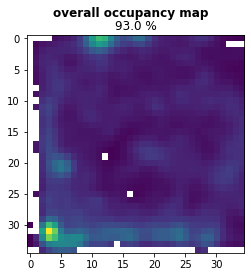

In [16]:
ap.occupancy_map_2d(xy_range=xy_range)
plt.imshow(ap.occupancy_map.T)
plt.suptitle("overall occupancy map", fontweight='bold')
plt.title("{:.1f} %".format(100*ap.occupancy(arena=arena)))
plt.show()

Plot the head-direction of the animal and its position a short segment.

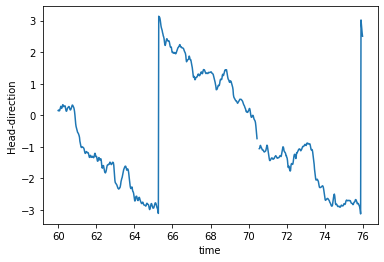

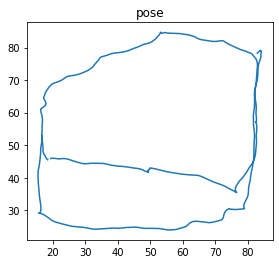

In [17]:
s=3000
e=3800

plt.plot(ap.pose[s:e,0], ap.pose[s:e,4])
plt.xlabel("time")
plt.ylabel("Head-direction")
plt.show()

plt.plot(ap.pose[s:e,1],ap.pose[s:e,2])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("pose")
plt.show()

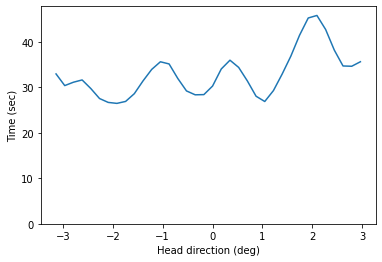

In [18]:
ap.head_direction_occupancy_histogram()
plt.plot(ap.hd_occupancy_bins[:-1],ap.hd_occupancy_histogram)
plt.ylim(0,np.max(ap.hd_occupancy_histogram)+2)
plt.ylabel("Time (sec)")
plt.xlabel("Head direction (deg)")
plt.show()

In [19]:
ap.invalid_outside_spatial_area(shape=arena, center=center, length=diameter)

array([[11., 23.],
       [81., 93.]])

#### filter data

In [20]:
ap.interpolate_pose()

In [21]:
ap.pose_at_time([42,7.7,1,1,1,1,1,1])

array([[59.97938034, 79.8680033 ,         nan,         nan,         nan,
                nan,         nan,         nan],
       [85.13027778, 57.71316832,         nan,         nan,         nan,
                nan,         nan,         nan],
       [ 0.39088429, -2.97606802,         nan,         nan,         nan,
                nan,         nan,         nan]])

In [22]:
time = ap.pose[:,0]
time

array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 1.18858e+03,
       1.18860e+03, 1.18862e+03])

In [23]:
xvals,yvals = ap.pose[:,1],ap.pose[:,2]

In [24]:
xvals.shape,yvals.shape

((59432,), (59432,))

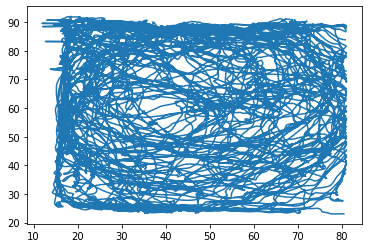

In [25]:
plt.plot(xvals,yvals)

In [26]:
from scipy.signal import medfilt


In [27]:
dtime = np.diff(time)[0]

In [28]:
windowlen_sec = .25 # 0.5
windowlen_ind = (int(windowlen_sec/dtime) // 2) * 2  + 1 # odd number
print("windowlen_ind", windowlen_ind)

windowlen_ind 13


In [29]:
xvals_ = medfilt(xvals, windowlen_ind)
yvals_ = medfilt(yvals, windowlen_ind)

In [30]:
xypos = np.transpose([xvals_,yvals_])
xypos.shape

(59432, 2)

In [31]:
xvals_.shape,yvals_.shape

((59432,), (59432,))

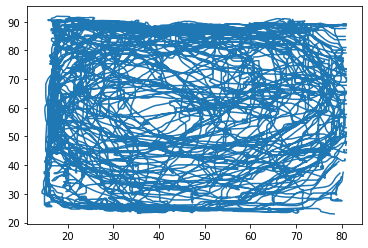

In [32]:
plt.plot(xvals_,yvals_)

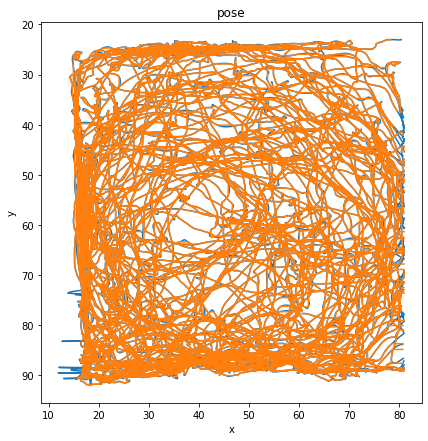

In [33]:
#plt.xlim((50,80))
#plt.ylim((30,50))

plt.figure(figsize=(7,7))

plt.plot(xvals,yvals)
plt.plot(xvals_,yvals_)
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("pose")
plt.show()

In [34]:
np.sum(np.isfinite(xvals)), np.sum(np.isfinite(xvals_))

(57395, 57405)

In [35]:
speed = np.sqrt(np.sum(np.diff(xypos, axis=0)**2, axis=1)) / dtime

In [36]:
speed_vector = np.diff(xypos, axis=0, append=np.nan) / dtime
moving_direction = np.arctan2(speed_vector[:,1], speed_vector[:,0])
speed = np.linalg.norm(speed_vector, axis=1)


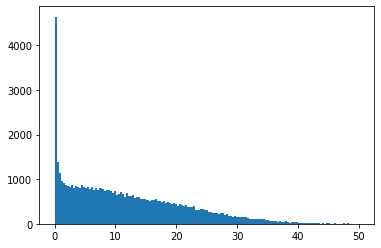

In [37]:
speed[speed>100]=np.nan
plt.hist(speed,bins=np.linspace(0,50,150))
plt.show()

(array([ 4266.,  3379.,  8088.,  3657., 11291.,  3569.,  3710.,  6354.,
         3422.,  9568.]),
 array([-3.14150969e+00, -2.51319945e+00, -1.88488922e+00, -1.25657899e+00,
        -6.28268751e-01,  4.14831216e-05,  6.28351717e-01,  1.25666195e+00,
         1.88497219e+00,  2.51328242e+00,  3.14159265e+00]),
 <BarContainer object of 10 artists>)

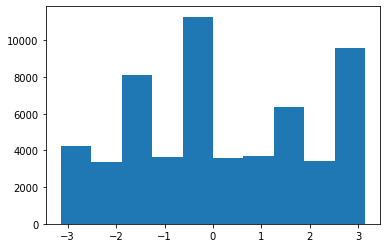

In [38]:
plt.hist(moving_direction)

## Overview

In [39]:
#
iv=ses.trial_intervals.inter
#iv=np.array([0.,1200.])
#iv=np.array([0.,1500.])
#iv=ses.trial_intervals.inter[0]

In [40]:
print("use interval",iv)

use interval [[   0.      1188.62995]]


i 0 / n 0
i 1 / n 1
i 2 / n 2
i 3 / n 3
i 4 / n 4
i 5 / n 5
i 6 / n 8
i 7 / n 9
GC pos
i 8 / n 11
i 9 / n 12
i 10 / n 14
i 11 / n 18
i 12 / n 23
i 13 / n 24
i 14 / n 25
i 15 / n 26
i 16 / n 27
i 17 / n 30
i 18 / n 31
i 19 / n 32
i 20 / n 33
i 21 / n 34
i 22 / n 35
i 23 / n 36
i 24 / n 45
i 25 / n 47
i 26 / n 50
i 27 / n 51
i 28 / n 55
i 29 / n 56
i 30 / n 57
i 31 / n 60
i 32 / n 91
i 33 / n 94
i 34 / n 95
i 35 / n 96
i 36 / n 98
i 37 / n 99


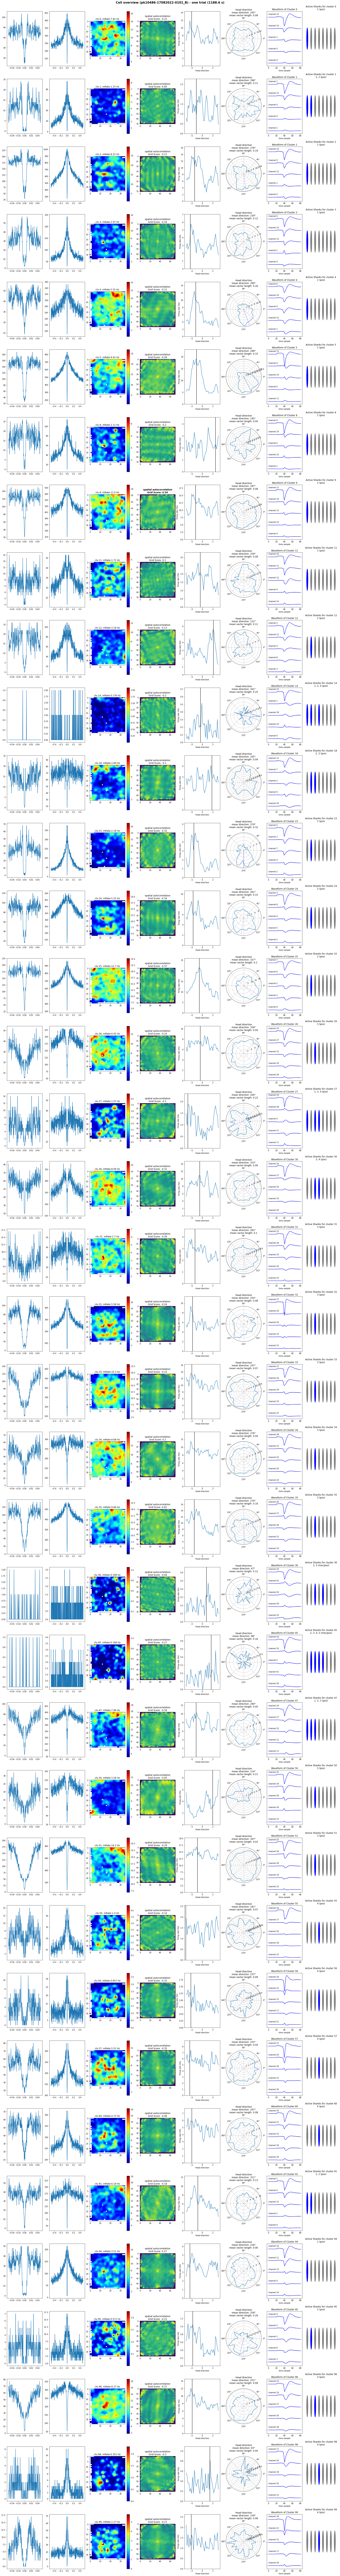

In [41]:
hd_firing_list=[] # neurons tuning curve
hd_ifr_list=[] # ifr list
spike_trains = [] # spike trains


# from matplotlib.patches import Rectangle

cols = 8

fig, axs = plt.subplots(len(cg.neuron_list), cols, figsize=(25, 5*len(cg.neuron_list)), squeeze=False, constrained_layout=True)
   
for i, n in enumerate(cg.neuron_list):
    
    # first interval only
    # iv = ses.trial_intervals.inter[0]
    # iv = np.array([iv])
    # custom interval (first 20min of light-dark-protocol -> light baseline)
    # iv=np.array([0.,1200.])
    #iv=np.array([6000.,7200.]) # last 20mins
    #iv=light_intervals
    # iv=np.array(first_block)

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(iv)
    ap.set_intervals(iv)
    
    n.set_spatial_properties(ap)
    
    print("i",i,"/","n",n.name)
    #print("n",n.spike_train.intervals.total_interval_duration_seconds())
    #print("ap",ap.intervals.total_interval_duration_seconds())
    
    
    
    # temporal auto-correlation
      
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    
    # clear intervals
    
    # n.spike_train.unset_intervals()
    # ap.unset_intervals()
    # n.spike_train.set_intervals(ses.trial_intervals.inter)
    # ap.set_intervals(ses.trial_intervals.inter)
    
    # spatial firing map 
    
    n.set_spatial_properties(ap)
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True, xy_range=xy_range) # xy_range
    im = axs[i,2].imshow(n.spatial_properties.firing_rate_map.T,cmap='jet')
    axs[i,2].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    fig.colorbar(im,ax=axs[i,2])
    
    
    # Spatial autocorrelation Map & Grid Score
    gs = n.spatial_properties.grid_score()
    
    fw = "bold" if gs>.4 else "normal"
    
    axs[i,3].imshow(n.spatial_properties.spatial_autocorrelation_map)
    axs[i,3].set_title("spatial autocorrelation"+"\n"+"Grid Score: "+str(round(gs,2)), fontweight=fw)
    
    # Head direction
    
    n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)
    
    angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
    hd_firing = n.spatial_properties.firing_rate_head_direction_histo
    hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()
    
    axs[i,4].plot(angles, hd_firing)
    axs[i,4].set_xlabel("Head direction")
    axs[i,4].set_ylabel("Firing rate (Hz)")
    axs[i,4].set_ylim(0, np.nanmax(n.spatial_properties.firing_rate_head_direction_histo)*1.2+0.1)
    axs[i,4].axvline(x=hd_mean_direction_rad, color="black")
    #axs[i,4].text(s=str(round(hd_mean_direction_rad*180./np.pi))+" ° (vector length = "+str(hd_mean_vector_length)+")",x=hd_mean+.1,y=1)
    
    fw = "bold" if hd_mean_vector_length>.4 else "normal"
    axs[i,5].axis('off')
    ax2 = fig.add_subplot(len(cg.neuron_list), cols, cols*i+6, polar=True)
    #ax2.plot(angles, hd_firing)
    ax2.plot(np.append(angles,angles[0]), np.append(hd_firing,hd_firing[0]))
    ax2.plot([hd_mean_direction_rad]*2, [0,max(hd_firing)] , color="blue", alpha=hd_mean_vector_length if np.isfinite(hd_mean_vector_length) else 0., lw=2.5  )
    if np.isfinite(hd_mean_direction_deg) and np.isfinite(hd_mean_vector_length):
        ax2.set_title("Head direction" + "\n" + "mean direction: " + str(round( (hd_mean_direction_deg + 360) % 360  )) +"°" + "\n" + "mean vector length: " + str(np.round(hd_mean_vector_length,2))  , fontweight=fw) 
    else:
        ax2.set_title("Head direction: no data")
    ax2.grid(True)

    
    
    # Waveforms
    
    cluster = int(n.name) # current cluster name
    channels = ses.get_channels_from_cluster(cluster) # get channels with highest amplitude
    
    if (len(channels)):
    
        for j,channel in enumerate(channels):
            channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel)
            axs[i,6].axhline( y = -j*.5 , color="grey" , lw=.5 )
            #label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
            label = "channel "+str(channel_mapped)
            axs[i,6].plot( waveform -j*.5 , label=label , color="blue")
            axs[i,6].text( s= label , x=0, y=-j*.5 +.1 )
        axs[i,6].set_xlabel("time sample")
        axs[i,6].set(yticklabels=[])  
        axs[i,6].set_title("Waveform of Cluster "+str(cluster))
        
        
    
    # channels / shanks / brain region
    shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)
    brain_region = '/'.join(electrodes)
   
    for j, (shank, active) in enumerate(zip(ses.shanks_all, shanks_arr)):
        color = 'blue' if active else 'gray'
        circle = plt.Circle((j,0), 0.2, color=color)
        axs[i,7].add_patch(circle)

    
    axs[i,7].axis('off')
    axs[i,7].set_title("Active Shanks for cluster "+str(cluster)+"\n"+', '.join([str(int(active_shank)) for active_shank in active_shanks]) + " ("+brain_region+")")
    
    axs[i,7].set_xlim([-1, len(ses.shanks_all)])
    axs[i,7].set_ylim([-0.5, 0.5])

    
    
    
    ###########################
    # classify, find category: Grid cell, HD cell
    
    #if i in [0,3,8,9,10,11,13,14,32]:
    # #if i in [18,19,20,23,25,29]:
    #if i in [11,12,13]:
    # if (n.name in ['20','43','45']):
    if (hd_mean_vector_length > 0.4 and hd_peak_rate > 10):
        print("HD", brain_region)
        n.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
        #~ print("n.name",n.name)
        #~ print("n.spike_train.ifr",n.spike_train.ifr)
        #~ print("n.spike_train.st",n.spike_train.st)
        
        hd_firing_list.append(hd_firing)
        hd_ifr_list.append(n.spike_train.ifr)
        spike_trains.append(n.spike_train.st)
        
        #rect = Rectangle((0.08, 1-(i+.5)/len(cg.neuron_list)), 0.85, 1/len(cg.neuron_list), facecolor='yellow', edgecolor='none', transform=fig.transFigure, zorder=-1)
        #fig.patches.append(rect)
        
    if gs>.4:
        print("GC", brain_region)

    
    
plt.suptitle("Cell overview ({}) - one trial ({:.1f} s)".format(name, n.spike_train.intervals.total_interval_duration_seconds()), fontsize=16, fontweight='bold')
#plt.tight_layout()
#
#fig.subplots_adjust(wspace=0.33, hspace=.5)
# fig.subplots_adjust(wspace=0.33, hspace=.5, top=0.95)
#fig.subplots_adjust(wspace=0.33, hspace=.5, top=1-.03-1/(len(cg.neuron_list)+5))
#~ 
plt.savefig('/home/pascal/Documents/science_docs/analysis_results/'+name+'.pdf')
plt.show()

In [42]:
### GC analysis temporal/spatial

In [43]:
# clu 8,16
# clu 41,42

In [44]:
# select HD cell

i = [n.name for n in cg.neuron_list].index('42')
n = cg.neuron_list[i]
i,n.name

ValueError: '42' is not in list

In [ ]:
n.spike_train.st.shape

In [ ]:
n1 = cg.neuron_list[21]
n2 = cg.neuron_list[22]

In [ ]:
n1.name, n2.name

In [ ]:
n1.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
ifr1 = np.array(n1.spike_train.ifr)

n2.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
ifr2 = np.array(n2.spike_train.ifr)

ifr1.shape, ifr2.shape

In [ ]:
ifr

In [ ]:
n.spike_train.instantaneous_firing_rate_power_spectrum()
n.spike_train.instantaneous_firing_rate_power_spectrum_plot()

In [ ]:
n1.spike_train.instantaneous_firing_rate_crosscorrelation(n2.spike_train)

In [ ]:
plt.plot(n1.spike_train.ifr_crosscorrelation)

In [ ]:
ifr1.shape, ifr2.shape

In [ ]:
ifr,count,mid = ifr1
mid

In [ ]:
ifr_1 = ifr1[0,:65000]
ifr_2 = ifr2[0,:65000]
mid = ifr1[2,:65000]

In [ ]:
from scipy.ndimage import gaussian_filter1d


In [ ]:
ifr_1 = gaussian_filter1d(ifr_1, sigma=5, mode='nearest')
ifr_2 = gaussian_filter1d(ifr_2, sigma=5, mode='nearest')

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(mid,ifr_1)
plt.plot(mid,ifr_2)
plt.xlim((100,142))

In [ ]:
i_start, i_end = 7000,7250
mid[i_start], mid[i_end]

In [ ]:
ifr_1_part = ifr_1[i_start:i_end]
ifr_2_part = ifr_2[i_start:i_end]

In [ ]:
plt.plot(mid[i_start:i_end], ifr_1_part)
plt.plot(mid[i_start:i_end], ifr_2_part)

In [ ]:
corr = np.correlate(ifr_1_part, ifr_2_part, mode='same')
corr.shape

In [ ]:
plt.plot(corr)

In [ ]:
np.argmax(corr)

In [ ]:
ap.pose[:,0]

In [ ]:
mid

In [ ]:
time_span = 2 # seconds to span in spike cross-correlation / movement
time_step = 0.2 # seconds to step in calculation

In [ ]:
sampling = np.diff(mid)[0] # inverse sampling rate
print("sampling", np.round(sampling,4))
samples_span = int(np.round(time_span / sampling))
samples_step = int(np.round(time_step / sampling))

In [ ]:
tvals = np.arange(samples_span) * sampling # samples_span = len(corr) when using method 'same'
tvals = tvals - np.max(tvals)/2

In [ ]:
t_all = []
t_max_all = []
c_max_all = []
pose_all = []

for i_start in np.arange(0, len(mid)-samples_span, samples_step):
    i_end = i_start + samples_span
    t_start, t_end = mid[i_start], mid[i_end]
    t = (t_start + t_end)/2
    t_all.append(t)
    #~ print(t_start, t_end, t)
    ifr_1_part = ifr_1[i_start:i_end]
    ifr_2_part = ifr_2[i_start:i_end]
    corr = np.correlate(ifr_1_part, ifr_2_part, mode='same')
    #~ plt.plot(tvals, corr)
    corr_argmax = np.argmax(corr)
    t_max = tvals[corr_argmax] # relative time difference with maximum correlation = temporal pattern offset
    c_max = corr[corr_argmax]
    t_max_all.append(t_max)
    c_max_all.append(c_max)
    
    pose0 = ap.pose_at_time(t_start) # x0,y0,hd0
    pose1 = ap.pose_at_time(t_end) # x1,y1,hd1
    pose_all.append([pose0,pose1])
    
    #break
    
t_all = np.array(t_all)
t_max_all = np.array(t_max_all)
c_max_all = np.array(c_max_all)
pose_all = np.array(pose_all)

In [ ]:
t_all.shape, t_max_all.shape, c_max_all.shape, pose_all.shape

In [ ]:
pose_diff = np.diff(pose_all, axis=1).squeeze()
pose_diff.shape

In [ ]:
def angle_diff(a,b, maxangle=360):
    delta = abs(a-b)
    return min( delta, maxangle-delta )

In [ ]:
angle_diffs = [angle_diff(0,hd_delta,2*np.pi) for hd_delta in pose_diff[:,2]]

In [ ]:
plt.hist(angle_diffs)
plt.title("HD change")
plt.xlabel("absolute HD delta")
plt.ylabel("occurences")
plt.show()

In [ ]:
pose_diff

In [ ]:
plt.plot(t_all, t_max_all, label="best delta t (highest correlation)")
plt.plot(t_all, c_max_all/np.max(c_max_all), label="correlation")
plt.xlim((800,820))
plt.legend()

In [ ]:
mean_velocity = np.sqrt(np.sum([pose_diff[:,0]**2, pose_diff[:,1]**2], axis=0)) / time_span
plt.plot(t_all, mean_velocity)
plt.xlabel("time [s]")
plt.ylabel("velocity [cm/s]")
plt.title("mean velocity")
plt.show()

In [ ]:
plt.scatter(t_all,mean_velocity,s=.1)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(pose_diff[:,0], pose_diff[:,1], c=t_max_all*mean_velocity, s=142*(c_max_all/np.max(c_max_all))**2, cmap='jet', vmin=-5,vmax=+5)
# use color: c=t_max_all*mean_velocity for distance instead of time
plt.colorbar()
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.xlabel("delta x")
plt.ylabel("delta y")
plt.title("cell activity lag (delta time) as a function of moving direction")
plt.show()

In [ ]:
# scipy.optimize.curve_fit
# https://stackoverflow.com/questions/27696324/using-scipy-optimize-curve-fit-with-weights  

In [ ]:
x_coords = np.arange(np.nanmin(X),np.nanmax(X)+1)
y_coords = np.arange(np.nanmin(Y),np.nanmax(Y)+1)
Z_interp = f(x_coords,y_coords)

In [ ]:
Z_interp

In [ ]:
plt.imshow(Z_interp)

In [ ]:
X=pose_diff[:,0]
Y=pose_diff[:,1]
Z=t_max_all

In [ ]:
plt.contourf(X, Y, Z, 100)

In [ ]:
from scipy import interpolate

In [ ]:
f = interpolate.interp2d(x=pose_diff[:,0], y=pose_diff[:,1], z=t_max_all, kind='linear') # cubic,...

In [ ]:
# save for HD decoding analysis

In [ ]:
len(spike_trains)

In [ ]:
np.max(ap.pose[:,0])

In [ ]:
angles = np.array(angles)
print("angles.shape",angles.shape)

hd_firing_list = np.array(hd_firing_list)
print("hd_firing_list.shape",hd_firing_list.shape)

hd_ifr_list = np.array(hd_ifr_list)
print("hd_ifr_list.shape",hd_ifr_list.shape)

spike_trains = np.array(spike_trains, dtype=object)
print("spike_trains.shape",spike_trains.shape)
#'''
#np.save("angles.npy",angles)
#np.save("hd_firing_list.npy",hd_firing_list)
#np.save("hd_ifr_list.npy",hd_ifr_list)
np.save("ap-pose.npy",ap.pose)
np.save("spike_trains.npy",spike_trains)
#'''
plt.plot(hd_ifr_list[0,2])
ap.pose[:,0].shape
hd_ifr_list[0,2,:].shape
ap.pose[:,0]
hd_ifr_list[0,2,:]

In [ ]:
xxx

In [ ]:
### analysis for temporal correlation of pair of cells (grid cells, show plot: peak of temporal correlation vs moving direction (vector speed) polar plot)

In [ ]:
n1,n2=cg.neuron_list[31],cg.neuron_list[33]

In [ ]:
st1,st2 = n1.spike_train.st, n2.spike_train.st

In [ ]:
len(st1), len(st2)

In [136]:
## -------------
# analysis for temporal resolution (HD drift / re-anchoring) within trial or across trials

In [137]:
# select HD cell

# 13
# 20,43,45

# 5,23

i = [n.name for n in cg.neuron_list].index('5')
n = cg.neuron_list[i]

In [138]:
ap.pose[:,0],

(array([1080.  , 1080.02, 1080.04, ..., 1139.96, 1139.98, 1140.  ]),)

In [139]:
#############
n.spatial_properties.set_intervals()
n.spike_train.unset_intervals()
ap.unset_intervals()


In [140]:
n.name

'5'

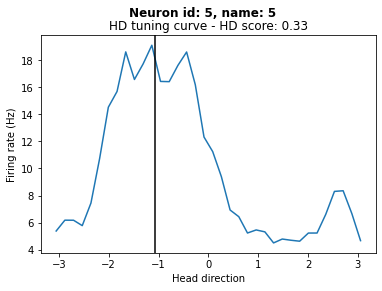

In [141]:
# Head direction

n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)

angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
hd_firing = n.spatial_properties.firing_rate_head_direction_histo
hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()

plt.plot(angles, hd_firing)
plt.xlabel("Head direction")
plt.ylabel("Firing rate (Hz)")
plt.axvline(x=hd_mean_direction_rad, color="black")
plt.suptitle("Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.title("HD tuning curve - HD score: {:.2f}".format(hd_mean_vector_length))
plt.show()

hd_mean_vector_length_avg = hd_mean_vector_length

In [142]:
# get pose by time

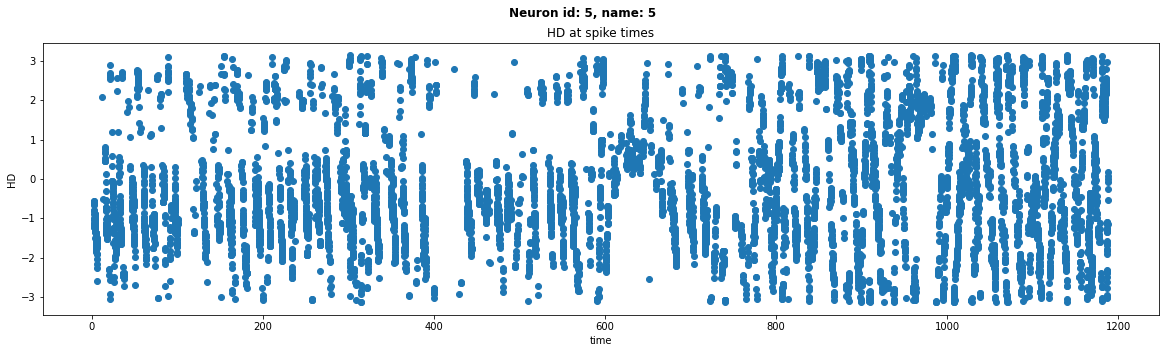

In [143]:
plt.figure(figsize=(20,5))
plt.scatter(n.spike_train.st, n.spatial_properties.spike_hd)
plt.suptitle("Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.title("HD at spike times")
plt.xlabel("time")
plt.ylabel("HD")
plt.show()

In [135]:
# bin 60 seconds

#~ np.linspace
times = np.arange(0,np.max(ses.trial_intervals.inter),60)
times

array([   0.,  120.,  240.,  360.,  480.,  600.,  720.,  840.,  960.,
       1080.])

In [144]:
sub_intervals = ap.times2intervals(times)

In [145]:
times_mid = ap.mid_point_from_edges(times)

In [146]:
hd_firing_all, hd_mvl_all, hd_mean_direction_rad_all, hd_peak_angle_rad_all, hd_peak_rate_all, mean_firing_rate_all = n.spatial_properties.firing_rate_head_direction_histogram_binned(sub_intervals)

In [147]:
hd_firing_all.shape, hd_mvl_all.shape, hd_mean_direction_rad_all.shape, hd_peak_angle_rad_all.shape, hd_peak_rate_all.shape, mean_firing_rate_all.shape

((9, 36), (9,), (9,), (9,), (9,), (9,))

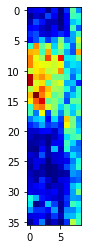

In [148]:
plt.imshow(hd_firing_all.T, cmap='jet')

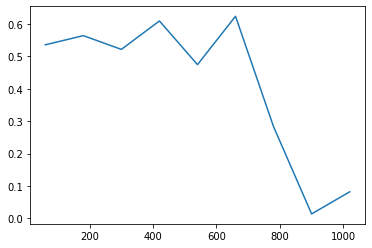

In [149]:
plt.plot(times_mid, hd_mvl_all)


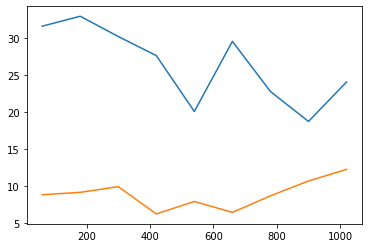

In [150]:
plt.plot(times_mid, hd_peak_rate_all)
plt.plot(times_mid, mean_firing_rate_all)


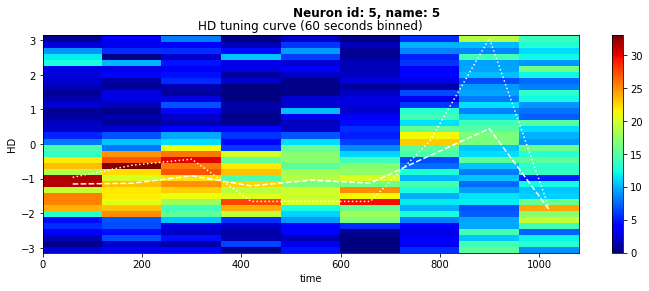

In [151]:
plt.figure(figsize=(12,4))
plt.pcolor(times_mid, angles, hd_firing_all.T, cmap='jet', shading='auto')
plt.plot(times_mid, hd_mean_direction_rad_all, color='white', ls='dashed')
plt.plot(times_mid, hd_peak_angle_rad_all, color='white', ls='dotted')
plt.xlabel("time")
plt.ylabel("HD")
plt.suptitle("Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.title("HD tuning curve (60 seconds binned)")
plt.colorbar()
plt.show()

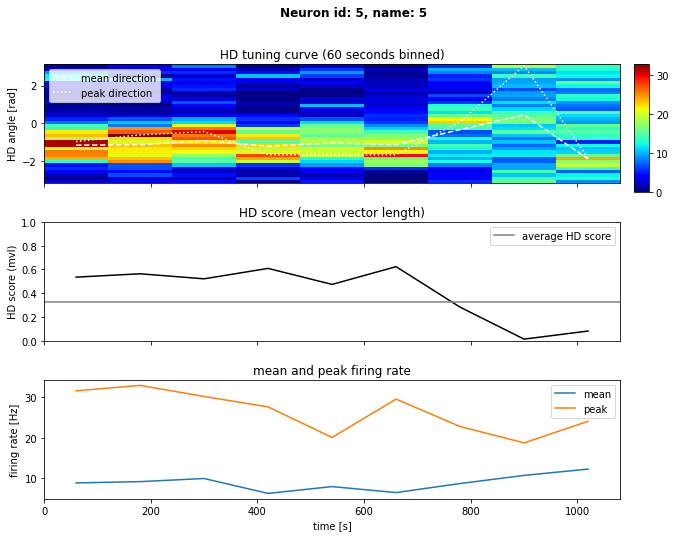

In [152]:
# https://stackoverflow.com/a/23480661

fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(10,8))

## HD tuning curve
im = axes[0].pcolor(times_mid, angles, hd_firing_all.T, cmap='jet', shading='auto')
axes[0].plot(times_mid, hd_mean_direction_rad_all, color='white', ls='dashed', label="mean direction")
axes[0].plot(times_mid, hd_peak_angle_rad_all, color='white', ls='dotted', label="peak direction")
axes[0].legend()
axes[0].set_title("HD tuning curve (60 seconds binned)")
axes[0].set_ylabel("HD angle [rad]")
# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.87)
# Add the colorbar outside...
box = axes[0].get_position()
pad, width = 0.02, 0.02
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im, cax=cax)

## HD score
axes[1].plot(times_mid, hd_mvl_all, color='black')
axes[1].set_title("HD score (mean vector length)")
axes[1].set_ylabel("HD score (mvl)")
axes[1].axhline(y=hd_mean_vector_length_avg, color='grey', label="average HD score")
axes[1].set_ylim(0,1)
axes[1].legend()

## neuron firing rate
axes[2].plot(times_mid, mean_firing_rate_all, label="mean")
axes[2].plot(times_mid, hd_peak_rate_all, label="peak")
#~ axes[2].plot(times_mid, hd_peak_rate_all / mean_firing_rate_all, label="peak/mean")

axes[2].set_title("mean and peak firing rate")
axes[2].set_ylabel("firing rate [Hz]")
axes[2].legend()

## trial separation for all axes
if ses.n_trials > 1:
    ses_start, ses_end = np.min(ses.trial_intervals.inter), np.max(ses.trial_intervals.inter)
    for i in range(len(axes)):
        axes[i].set_xlim(ses_start, ses_end)
    for intv in ses.trial_intervals.inter:
        intv_start, intv_end = intv
        for i in range(len(axes)):
            axes[i].axvline(x=intv_start, color='grey')
            axes[i].axvline(x=intv_end, color='grey')


## figure
axes[-1].set_xlabel("time [s]")
fig.suptitle("Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.33) # https://stackoverflow.com/a/6541454
plt.show()

In [ ]:
# ----------------------------------------

In [ ]:
# https://stackoverflow.com/a/33505522

from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [ ]:
im = plt.pcolor(angles, range(len(hd_firing_all)), hd_firing_all, shading='auto', cmap='Greys', vmin=0, vmax=np.max(hd_firing_all))
add_colorbar(im)
plt.xlabel("angle")
plt.ylabel("time")
plt.gca().invert_yaxis()
plt.title("HD tuning curve (firing rate), with temporal resolution")
plt.show()

In [ ]:
plt.plot(angles, np.mean(hd_firing_all, axis=0))

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=False, figsize=(8,4))
fig.subplots_adjust(hspace=0)

im = axes[0].pcolor(angles, range(len(hd_firing_all)), hd_firing_all, shading='auto', cmap='Greys', vmin=0, vmax=np.max(hd_firing_all))
add_colorbar(im)
axes[0].xlabel("angle")
axes[0].ylabel("time")
axes[0].gca().invert_yaxis()
plt.suptitle("HD tuning curve (firing rate), with temporal resolution")
plt.show()

In [ ]:
# ------------- HD IFR

In [ ]:
X=np.array(hd_ifr_list)[:,0].T
X.shape

In [ ]:
plt.plot(X)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents.shape

In [ ]:
print(pca.explained_variance_ratio_)


In [ ]:
pca.components_

In [ ]:
principalComponents.shape

In [ ]:
plt.scatter(principalComponents[:,0], principalComponents[:,1])

In [ ]:
plt.scatter(X[:,0], X[:,1])